In [1]:
import pandas as pd
import numpy as np

In [2]:
ibov_historic = pd.read_csv("./database.csv")

In [3]:
ibov_historic.head()

,date,open,volume,high,low,close,adjclose,rsi,BOLM,BOLU,BOLD,STOCH,%R,ROC,SMA,EMA,MACD,CCI,OBV,STOCHrsi
0,2015-12-01,43.860001,2462470,44.080002,43.410000,43.529999,43.529999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462470.0,NaN
1,2015-12-02,43.650002,5994100,43.990002,43.230000,43.459999,43.459999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3531630.0,NaN
2,2015-12-03,44.970001,3894990,45.790001,44.750000,44.970001,44.970001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363360.0,NaN
3,2015-12-04,44.889999,2320720,44.889999,43.680000,44.099998,44.099998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1957360.0,NaN
4,2015-12-07,44.320000,2047760,44.770000,43.849998,43.950001,43.950001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4005120.0,NaN


# EDA

In [4]:
from pandas_profiling import ProfileReport

In [5]:
#profile = ProfileReport(ibov_historic, title="Profiling Report IBOV", explorative=True)

In [6]:
#profile.to_widgets()

In [7]:
base_modelagem = ibov_historic.copy()

In [8]:
base_modelagem.head()

,date,open,volume,high,low,close,adjclose,rsi,BOLM,BOLU,BOLD,STOCH,%R,ROC,SMA,EMA,MACD,CCI,OBV,STOCHrsi
0,2015-12-01,43.860001,2462470,44.080002,43.410000,43.529999,43.529999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462470.0,NaN
1,2015-12-02,43.650002,5994100,43.990002,43.230000,43.459999,43.459999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3531630.0,NaN
2,2015-12-03,44.970001,3894990,45.790001,44.750000,44.970001,44.970001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363360.0,NaN
3,2015-12-04,44.889999,2320720,44.889999,43.680000,44.099998,44.099998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1957360.0,NaN
4,2015-12-07,44.320000,2047760,44.770000,43.849998,43.950001,43.950001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4005120.0,NaN


In [9]:
base_modelagem.shape

(1489, 20)

In [10]:
base_modelagem = base_modelagem.set_index("date")

### Função para criar os targets

In [11]:
import numpy as np

In [12]:
def target_build(close, p_open, shift):
    """Função para construir o alvo da modelagem, indicando se
    houve uma variação positiva ou negativa, em um intervalo delta"""
    returns = np.log(close.shift(-shift)/p_open)
    #target = np.sign(returns)
    target = np.where(returns>=0, 1, 0)
        
    return target, returns
            

In [13]:
# Aplicando a função para criar o alvo de para prever variação positiva, negativa ou sem variação de 1 a 5 dias
for i in range(1, 6):
    name = "target_" + str(i) + "_dias"
    tgt, ret = target_build(base_modelagem.close, base_modelagem.open, i)
    base_modelagem[name] = tgt
    if i == 1:
        base_modelagem['Returns'] = ret


In [14]:
base_modelagem.head(10)
#sinal está certo: se retorno de amanhã é negativo -> venda hoje


,open,volume,high,low,close,adjclose,rsi,BOLM,BOLU,BOLD,...,MACD,CCI,OBV,STOCHrsi,target_1_dias,Returns,target_2_dias,target_3_dias,target_4_dias,target_5_dias
date,,,,,,,,,,,,,,,,,,,,,
2015-12-01,43.860001,2462470,44.080002,43.410000,43.529999,43.529999,NaN,NaN,NaN,NaN,...,NaN,NaN,2462470.0,NaN,0,-0.009162,1,1,1,0
2015-12-02,43.650002,5994100,43.990002,43.230000,43.459999,43.459999,NaN,NaN,NaN,NaN,...,NaN,NaN,-3531630.0,NaN,1,0.029792,1,1,0,1
2015-12-03,44.970001,3894990,45.790001,44.750000,44.970001,44.970001,NaN,NaN,NaN,NaN,...,NaN,NaN,363360.0,NaN,0,-0.019536,0,0,0,0
2015-12-04,44.889999,2320720,44.889999,43.680000,44.099998,44.099998,NaN,NaN,NaN,NaN,...,NaN,NaN,-1957360.0,NaN,0,-0.021162,0,0,0,0
2015-12-07,44.320000,2047760,44.770000,43.849998,43.950001,43.950001,NaN,NaN,NaN,NaN,...,NaN,NaN,-4005120.0,NaN,0,-0.029074,1,1,0,0
2015-12-08,43.849998,4818120,43.900002,42.900002,43.049999,43.049999,NaN,NaN,NaN,NaN,...,NaN,NaN,-8823240.0,NaN,1,0.018080,1,1,0,0
2015-12-09,43.619999,1993870,45.029999,43.619999,44.650002,44.650002,NaN,NaN,NaN,NaN,...,NaN,NaN,-6829370.0,NaN,1,0.015920,1,0,0,1
2015-12-10,44.799999,2184890,44.799999,43.990002,44.320000,44.320000,NaN,NaN,NaN,NaN,...,NaN,NaN,-9014260.0,NaN,0,-0.019838,0,0,0,0
2015-12-11,43.810001,3775130,44.619999,43.680000,43.919998,43.919998,NaN,NaN,NaN,NaN,...,NaN,NaN,-12789390.0,NaN,0,-0.008712,0,0,0,0


### Distribuição dos targets

#### 1 dia

In [15]:
base_modelagem.target_1_dias.value_counts(dropna=False)

1    785
0    704
Name: target_1_dias, dtype: int64

#### 2 dias

In [16]:
#base_modelagem.target_2_dias.value_counts(dropna=False)

#### 3 dias

In [17]:
#base_modelagem.target_3_dias.value_counts(dropna=False)

#### 4 dias

In [18]:
#base_modelagem.target_4_dias.value_counts(dropna=False)

#### 5 dias

In [19]:
#base_modelagem.target_5_dias.value_counts(dropna=False)

# Feature Selection

In [20]:
base_1_dia = base_modelagem.drop(columns=["high","volume","close","low","open","adjclose","target_2_dias","target_3_dias","target_4_dias","target_5_dias"])

In [21]:
base_1_dia.head()

,rsi,BOLM,BOLU,BOLD,STOCH,%R,ROC,SMA,EMA,MACD,CCI,OBV,STOCHrsi,target_1_dias,Returns
date,,,,,,,,,,,,,,,
2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462470.0,NaN,0,-0.009162
2015-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3531630.0,NaN,1,0.029792
2015-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363360.0,NaN,0,-0.019536
2015-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1957360.0,NaN,0,-0.021162
2015-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4005120.0,NaN,0,-0.029074


### Removendo valores faltantes

In [22]:
base_1_dia.dropna(inplace=True)

In [23]:
base_1_dia.shape

(1463, 15)

In [24]:
base_1_dia.corr()

,rsi,BOLM,BOLU,BOLD,STOCH,%R,ROC,SMA,EMA,MACD,CCI,OBV,STOCHrsi,target_1_dias,Returns
rsi,1.000000,-0.089528,-0.090394,-0.086920,0.859325,0.814094,0.847104,-0.056600,-0.046805,-0.602858,0.841179,0.009709,1.000000,0.129724,0.147276
BOLM,-0.089528,1.000000,0.991066,0.990275,-0.083046,-0.087507,-0.142122,0.998733,0.998388,-0.016081,-0.149497,0.931944,-0.089528,-0.046239,-0.079198
BOLU,-0.090394,0.991066,1.000000,0.962874,-0.085519,-0.089017,-0.182594,0.986799,0.986411,0.053977,-0.152192,0.914330,-0.090394,-0.044261,-0.085751
BOLD,-0.086920,0.990275,0.962874,1.000000,-0.078886,-0.084265,-0.097198,0.992163,0.991869,-0.088855,-0.143839,0.932571,-0.086920,-0.047422,-0.070853
STOCH,0.859325,-0.083046,-0.085519,-0.078886,1.000000,0.906265,0.748077,-0.056772,-0.043096,-0.526613,0.905609,0.002201,0.859325,0.072458,0.072781
%R,0.814094,-0.087507,-0.089017,-0.084265,0.906265,1.000000,0.710274,-0.065884,-0.052652,-0.446387,0.918182,0.000833,0.814094,0.209449,0.205300
ROC,0.847104,-0.142122,-0.182594,-0.097198,0.748077,0.710274,1.000000,-0.101931,-0.090357,-0.730748,0.740433,-0.049924,0.847104,0.105332,0.163166
SMA,-0.056600,0.998733,0.986799,0.992163,-0.056772,-0.065884,-0.101931,1.000000,0.999655,-0.060276,-0.124150,0.934245,-0.056600,-0.044495,-0.075448
EMA,-0.046805,0.998388,0.986411,0.991869,-0.043096,-0.052652,-0.090357,0.999655,1.000000,-0.061247,-0.111997,0.935609,-0.046805,-0.043555,-0.072760
MACD,-0.602858,-0.016081,0.053977,-0.088855,-0.526613,-0.446387,-0.730748,-0.060276,-0.061247,1.000000,-0.520871,-0.079269,-0.602858,-0.026528,-0.075127


In [25]:
corr = base_1_dia.corr()

### Seleção das colunas com base na correlação

In [26]:
# columns = np.full((len(corr),), True, dtype=bool)
# for i in range(len(corr)):
#     for j in range(i+1, len(corr)):
#         if corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9:
#             if columns[j]:
#                 columns[j] = False

In [27]:
# selected_columns = base_1_dia.columns[columns]

# base_1_dia = base_1_dia[selected_columns]

In [28]:
base_1_dia

,rsi,BOLM,BOLU,BOLD,STOCH,%R,ROC,SMA,EMA,MACD,CCI,OBV,STOCHrsi,target_1_dias,Returns
date,,,,,,,,,,,,,,,
2016-01-11,12.979362,42.302333,45.465425,39.139242,0.060158,-100.000000,-11.476910,41.472143,41.153916,1.676824,-132.015666,-24470500.0,5.624616,0,-0.030282
2016-01-12,12.359561,42.010167,45.403065,38.617269,0.734937,-97.975663,-12.254230,41.089286,40.784060,1.754354,-129.879147,-26567960.0,4.933713,0,-0.031293
2016-01-13,13.353574,41.698500,45.305472,38.091528,0.674779,-100.000000,-11.343357,40.744286,40.379519,1.845361,-126.785323,-31772940.0,6.041757,0,-0.007808
2016-01-14,21.604951,41.394167,45.171381,37.616952,6.091446,-83.749998,-8.772349,40.481429,40.098250,1.854151,-116.393807,-28987310.0,15.239706,0,-0.006648
2016-01-15,16.022917,41.087000,45.142062,37.031939,9.616565,-87.400305,-11.247928,40.142143,39.749150,1.902928,-121.762806,-31599470.0,9.017318,0,-0.020469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,45.539267,101.536833,104.399481,98.674185,12.762050,-82.232749,-1.331879,100.793571,101.064575,1.816220,-99.441905,227155957.0,41.919693,0,-0.005583
2021-11-22,45.238086,101.312500,104.219112,98.405887,9.119485,-98.427697,-1.444625,100.690714,100.687965,1.886208,-93.327382,218439575.0,41.583962,1,0.004711
2021-11-23,44.946820,101.194166,104.224619,98.163714,17.121250,-67.975803,-1.497239,100.582142,100.596236,1.779148,-73.241758,230899246.0,41.259283,1,0.014913


In [29]:
#base_1_dia[list(base_1_dia.columns.values[:-1])] = base_1_dia[list(base_1_dia.columns.values[:-1])].shift(1)
#base_1_dia.dropna(inplace=True)

## Modelagem

### Divisão out of time da base

In [30]:
#base_1_dia = base_1_dia[base_1_dia.target_1_dias != 0]

In [31]:
X = base_1_dia.drop(columns=["target_1_dias", "Returns"])
y = base_1_dia["target_1_dias"]

In [32]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
## cross validation test
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

rf = RandomForestClassifier(random_state=5)

#Perform a TimeSeriesSplit on the dataset
time_series_split = TimeSeriesSplit(n_splits = 5)

params = {'max_depth': [5, 7, 9, 11],
          'max_features': ['sqrt'],
          'min_samples_leaf': [10, 15, 20, 25, 30, 35],
          'n_estimators': [5, 7, 9, 11, 13, 15],
         'min_samples_split':[20, 25, 30, 40, 50]} 

rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = -1, verbose = 20)

rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35],
                         'min_samples_split': [20, 25, 30, 40, 50],
                         'n_estimators': [5, 7, 9, 11, 13, 15]},
             verbose=20)

In [36]:
y_pred = rf_cv.best_estimator_.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred, normalize='true'))

[[0.59134615 0.40865385]
 [0.39393939 0.60606061]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       208
           1       0.62      0.61      0.61       231

    accuracy                           0.60       439
   macro avg       0.60      0.60      0.60       439
weighted avg       0.60      0.60      0.60       439



### Backtesting

In [62]:
backtest_df = base_1_dia[int(base_1_dia.shape[0]*0.7):]

In [72]:
pd.options.mode.chained_assignment = None 
backtest_df['Position'] = rf_cv.best_estimator_.predict(X_test)

In [73]:
backtest_df['Strategy'] = backtest_df['Position']*backtest_df['Returns']

In [74]:
np.exp(backtest_df[['Returns', 'Strategy']].sum())

Returns     0.562753
Strategy    2.074979
dtype: float64

'Random Forest Strategy'

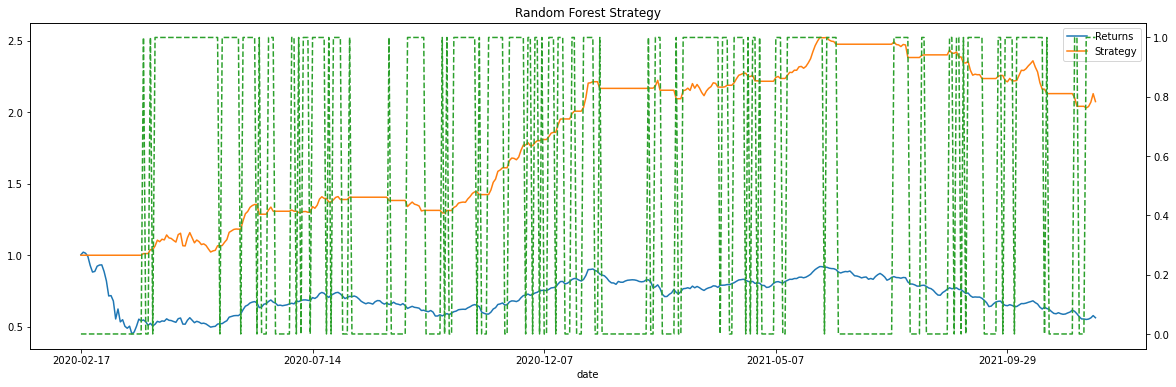

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = backtest_df[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(20, 6), title = "Random Forest Strategy")
backtest_df['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend()
ax.get_title()

## Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
## cross validation test
gb = GradientBoostingClassifier(random_state=5)

#Perform a TimeSeriesSplit on the dataset
time_series_split = TimeSeriesSplit(n_splits = 5)

params = {"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
            "min_samples_split": [0.1, 0.25, 0.5],
            "min_samples_leaf": [0.1, 0.5, 1, 10, 20],
            "max_depth":[3,5,8,10],
            "max_features":["sqrt"],
            "subsample":[0.5, 0.8,  0.9, 1.0],
            "n_estimators":[5, 10, 12]
         } 

gb_cv = GridSearchCV(gb, params, cv = time_series_split, n_jobs = -1, verbose = 20)

gb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingClassifier(random_state=5), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [3, 5, 8, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [0.1, 0.5, 1, 10, 20],
                         'min_samples_split': [0.1, 0.25, 0.5],
                         'n_estimators': [5, 10, 12],
                         'subsample': [0.5, 0.8, 0.9, 1.0]},
             verbose=20)

In [46]:
y_pred = gb_cv.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred, normalize='true'))

[[0.78846154 0.21153846]
 [0.56709957 0.43290043]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.79      0.65       208
           1       0.69      0.43      0.53       231

    accuracy                           0.60       439
   macro avg       0.63      0.61      0.59       439
weighted avg       0.63      0.60      0.59       439



In [76]:
backtest_df = base_1_dia[int(base_1_dia.shape[0]*0.7):]

pd.options.mode.chained_assignment = None 
backtest_df['Position'] = gb_cv.best_estimator_.predict(X_test)

backtest_df['Strategy'] = backtest_df['Position']*backtest_df['Returns']

np.exp(backtest_df[['Returns', 'Strategy']].sum())

Returns     0.562753
Strategy    3.041518
dtype: float64

'Gradient Boosting Strategy'

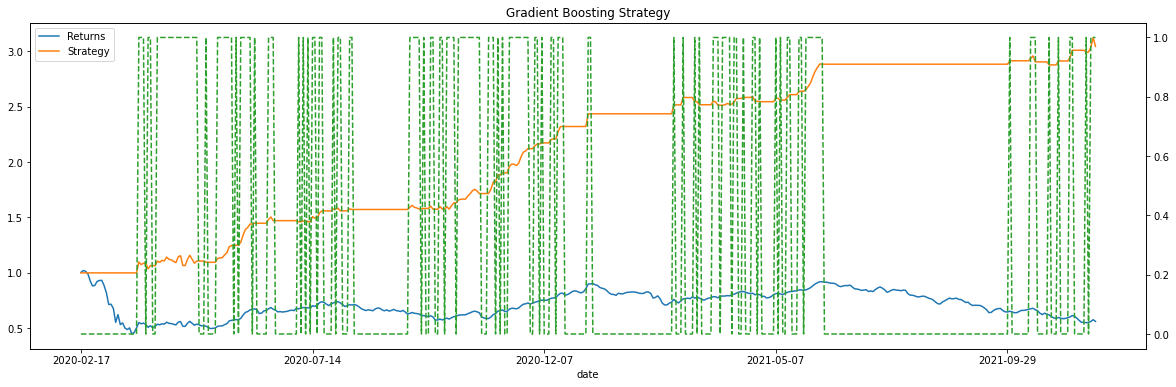

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = backtest_df[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(20, 6), title = "Gradient Boosting Strategy")
backtest_df['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend()
ax.get_title()

## SVM

In [50]:
from sklearn import preprocessing

In [51]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [52]:
from sklearn.svm import SVC  
svm = SVC()

time_series_split = TimeSeriesSplit(n_splits = 5)

params = {'C': [0.1, 10, 100], 'gamma': [0.01, 0.1, 1],'kernel': ['rbf', 'linear']}

svm_cv = GridSearchCV(svm, params, cv = time_series_split, n_jobs = -1, verbose = 20)

svm_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             verbose=20)

In [78]:
y_pred = svm_cv.best_estimator_.predict(X_test_std)
print(confusion_matrix(y_test, y_pred, normalize='true'))

[[0.61057692 0.38942308]
 [0.3982684  0.6017316 ]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       208
           1       0.63      0.60      0.62       231

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



In [80]:
backtest_df = base_1_dia[int(base_1_dia.shape[0]*0.7):]

pd.options.mode.chained_assignment = None 
backtest_df['Position'] = svm_cv.best_estimator_.predict(X_test_std)

backtest_df['Strategy'] = backtest_df['Position']*backtest_df['Returns']

np.exp(backtest_df[['Returns', 'Strategy']].sum())

Returns     0.562753
Strategy    2.664149
dtype: float64

'SVM Strategy'

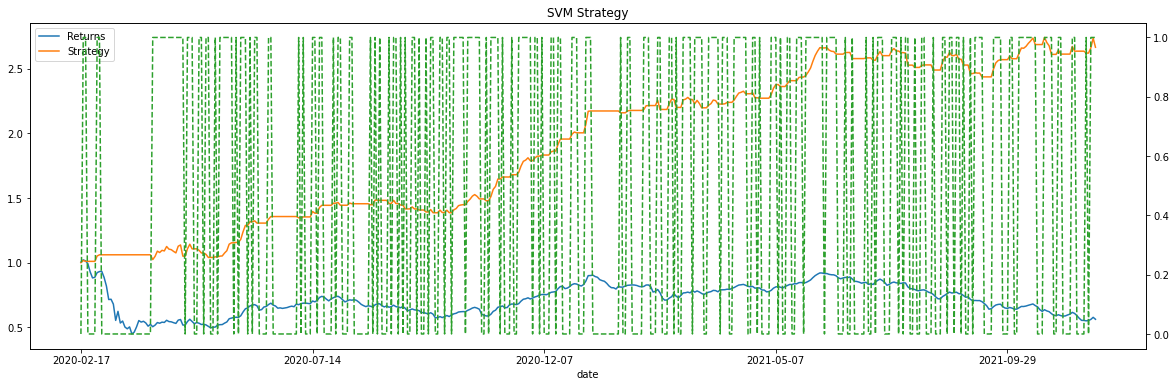

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = backtest_df[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(20, 6), title = "SVM Strategy")
backtest_df['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend()
ax.get_title()

## MLP

In [57]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100000)

params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
}


mlp_cv = GridSearchCV(mlp, params, cv = time_series_split, n_jobs = -1, verbose = 20)

mlp_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)]},
             verbose=20)

In [84]:
y_pred = mlp_cv.best_estimator_.predict(X_test_std)
print(confusion_matrix(y_test, y_pred, normalize='true'))

[[0.61057692 0.38942308]
 [0.34632035 0.65367965]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       208
           1       0.65      0.65      0.65       231

    accuracy                           0.63       439
   macro avg       0.63      0.63      0.63       439
weighted avg       0.63      0.63      0.63       439



In [82]:
backtest_df = base_1_dia[int(base_1_dia.shape[0]*0.7):]

pd.options.mode.chained_assignment = None 
backtest_df['Position'] = mlp_cv.best_estimator_.predict(X_test_std)

backtest_df['Strategy'] = backtest_df['Position']*backtest_df['Returns']

np.exp(backtest_df[['Returns', 'Strategy']].sum())

Returns     0.562753
Strategy    2.300118
dtype: float64

'MLP Strategy'

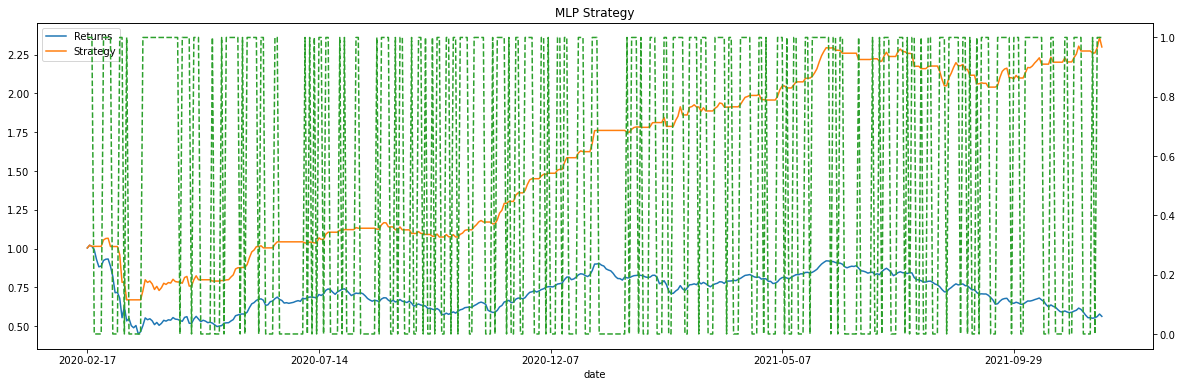

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = backtest_df[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(20, 6), title="MLP Strategy")
backtest_df['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend()
ax.get_title()